# 프로젝트 (1) load_digits : 손글씨를 분류해 봅시다

In [1]:
import sklearn

print(sklearn.__version__)

1.0


### (1) 필요한 모듈 import하기
### (2) 데이터 준비

In [2]:
# 필요한 모듈 import
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 데이터셋 가져오기
from sklearn.datasets import load_digits
digits = load_digits()

# digits의 정보 확인
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
print(dir(digits))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


### (3) 데이터 이해하기

In [4]:
# 가장 중요한 데이터를 digits_data에 저장
digits_data = digits.data

print(digits_data.shape) 
# shape는 배열의 형상정보를 출력
# 총 1797개의 데이터가 각각 64개의 정보를 담고 있다

(1797, 64)


In [5]:
# 샘플로 첫번째 데이터 확인

digits_data[0]
# 64개의 정보(integer)를 8x8 이미지의 픽셀로 봐야 함

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [6]:
# digits.feature 정보
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

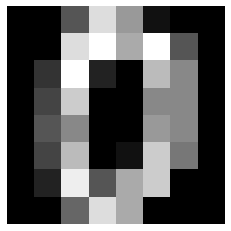

In [7]:
# 이미지 확인
import matplotlib.pyplot as plt
%matplotlib inline

# 일렬로 펴진 64개 데이터를 (8, 8)로 reshape!
plt.imshow(digits_data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

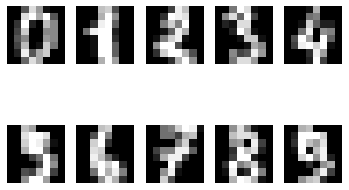

In [8]:
# 여러 개 이미지 한꺼번에 확인하기
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

In [9]:
# digits의 타겟 정보 확인
# 0~9까지의 숫자 10개
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
# 타겟 정보를 라벨로 이름 붙인다
digits_label = digits.target

In [11]:
import pandas as pd

print(pd.__version__)

1.3.3


In [12]:
# digits손글씨 데이터셋을 DataFrame으로 변환
# data에는 digits_data를 넣어주고, 각 컬럼에는 feature_names으로 이름을 붙여주었다
digits_df = pd.DataFrame(data=digits_data, columns=digits.feature_names)
digits_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [13]:
# 정답 데이터도 있으면 데이터를 다루기 더 편리할 것, label 컬럼 추가
digits_df["label"] = digits.target
digits_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


### (4) train, test 데이터 분리

In [14]:
X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=15) 

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))
print('y_train 개수: ', len(y_train),', y_test 개수: ', len(y_test))

# 총 1797개의 데이터 중 약 20% 데이터가 test 데이터셋에, 약 80% 데이터가 train 데이터셋에 잘 들어갔다.

X_train 개수:  1437 , X_test 개수:  360
y_train 개수:  1437 , y_test 개수:  360


In [15]:
# y를 확인해보기
y_train, y_test

# 원래 label 값과 다르게 잘 섞여있는 것을 확인

(array([6, 4, 3, ..., 8, 8, 6]),
 array([9, 4, 4, 1, 2, 6, 4, 2, 5, 1, 5, 6, 8, 6, 6, 6, 4, 6, 1, 3, 3, 5,
        2, 6, 7, 5, 4, 3, 7, 3, 9, 0, 4, 6, 8, 7, 1, 8, 7, 9, 8, 0, 4, 9,
        3, 8, 7, 6, 7, 2, 8, 9, 3, 1, 2, 8, 6, 4, 8, 4, 2, 9, 5, 0, 9, 5,
        8, 3, 4, 4, 6, 4, 9, 0, 0, 3, 2, 4, 4, 5, 2, 7, 1, 6, 3, 1, 3, 1,
        2, 0, 7, 2, 5, 0, 5, 2, 9, 2, 9, 7, 0, 1, 0, 1, 6, 3, 8, 8, 2, 7,
        8, 3, 9, 7, 1, 3, 4, 6, 0, 6, 9, 6, 5, 1, 2, 9, 2, 5, 0, 6, 8, 8,
        2, 4, 7, 6, 4, 7, 7, 9, 6, 5, 9, 2, 1, 6, 6, 6, 9, 0, 9, 5, 1, 8,
        7, 2, 9, 4, 1, 6, 8, 8, 8, 9, 2, 4, 0, 5, 5, 0, 3, 2, 5, 4, 8, 4,
        1, 2, 0, 7, 9, 7, 4, 1, 8, 0, 2, 4, 5, 1, 9, 6, 8, 2, 5, 6, 6, 5,
        2, 5, 7, 6, 5, 0, 5, 2, 8, 3, 4, 8, 1, 4, 2, 4, 1, 0, 7, 3, 4, 8,
        8, 9, 1, 2, 4, 4, 4, 1, 2, 4, 9, 1, 9, 2, 1, 6, 6, 4, 4, 9, 9, 1,
        0, 6, 5, 9, 4, 5, 7, 0, 9, 5, 2, 7, 9, 5, 9, 9, 5, 0, 7, 9, 7, 6,
        2, 5, 5, 8, 7, 8, 7, 6, 2, 2, 8, 5, 7, 1, 1, 1, 3, 0, 2, 3, 1, 7,
     

### (5) 다양한 모델로 학습시켜보기
### (6) 모델을 평가해 보기

In [16]:
# Decision Tree 학습시키기
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# 모델 학습 및 예측
decision_tree = DecisionTreeClassifier(random_state=15) 
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        31
           1       0.84      0.82      0.83        38
           2       0.73      0.87      0.80        38
           3       0.71      0.74      0.73        27
           4       0.94      0.80      0.87        41
           5       0.87      0.94      0.90        35
           6       0.87      0.89      0.88        38
           7       0.91      0.94      0.93        34
           8       0.79      0.77      0.78        35
           9       0.80      0.77      0.79        43

    accuracy                           0.84       360
   macro avg       0.85      0.85      0.84       360
weighted avg       0.85      0.84      0.85       360



<Decision Tree 평가하기>
- precision: 0.85 <br>
precision min: 0.71(3) <br>
precision max: 1.00(0) <br><br>
- recall: 0.85 <br>
recall min: 0.74(3) <br>
recall max: 0.94(5) <br><br>
- accuracy: 0.84 <br><br>
- f1-score: 0.84 <br>
f1-score min: 0.73(3) <br>
f1-score max: 0.95(0) <br>

In [17]:
# Random Forest 학습시키기
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=21)

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        30
           3       0.98      0.98      0.98        41
           4       0.94      0.97      0.95        32
           5       1.00      0.98      0.99        46
           6       1.00      0.97      0.98        32
           7       0.98      1.00      0.99        40
           8       0.93      0.98      0.95        42
           9       1.00      0.93      0.96        29

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.98      0.97      0.98       360



<Random Forest 평가하기>
- precision: 0.98 <br>
precision min: 0.93(8) <br>
precision max: 1.00(2, 5, 6, 9) <br><br>
- recall: 0.97 <br>
recall min: 0.93(9) <br>
recall max: 1.00(1, 2, 7) <br><br>
- accuracy: 0.97 <br><br>
- f1-score: 0.97 <br>
f1-score min: 0.95(0, 4, 8) <br>
f1-score max: 1.00(2) <br>

In [18]:
# SVM모델 학습시키기
from sklearn import svm
svm_model = svm.SVC()

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.95      1.00      0.97        36
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        41
           4       0.97      1.00      0.98        32
           5       0.98      1.00      0.99        46
           6       1.00      1.00      1.00        32
           7       1.00      1.00      1.00        40
           8       0.98      0.95      0.96        42
           9       1.00      0.93      0.96        29

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



<SVM 평가하기>
- precision: 0.99 <br>
precision min: 0.95(1) <br>
precision max: 1.00(0, 2, 3, 6, 7, 9) <br><br>
- recall: 0.99 <br>
recall min: 0.93(9) <br>
recall max: 1.00(1, 2, 3, 4, 5, 6, 7) <br><br>
- accuracy: 0.99 <br><br>
- f1-score: 0.99 <br>
f1-score min: 0.96(8, 9) <br>
f1-score max: 1.00(2, 3, 6, 7) <br>

In [19]:
# SGD모델 학습시키기

from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        32
           1       0.97      0.86      0.91        36
           2       1.00      0.93      0.97        30
           3       1.00      0.78      0.88        41
           4       0.97      1.00      0.98        32
           5       0.94      0.98      0.96        46
           6       1.00      1.00      1.00        32
           7       1.00      0.95      0.97        40
           8       0.69      0.98      0.81        42
           9       0.93      0.90      0.91        29

    accuracy                           0.93       360
   macro avg       0.95      0.93      0.94       360
weighted avg       0.94      0.93      0.93       360



<SGD 평가하기>
- precision: 0.97 <br>
precision min: 0.94(1, 4, 5, 6) <br>
precision max: 1.00(0, 2, 7, 9) <br><br>
- recall: 0.97 <br>
recall min: 0.88(8) <br>
recall max: 1.00(2, 4, 5, 6, 7) <br><br>
- accuracy: 0.97 <br><br>
- f1-score: 0.97 <br>
f1-score min: 0.93(8) <br>
f1-score max: 1.00(2, 7) <br>

In [ ]:
# Logistic Regression 모델 학습시키기
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=5000)

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

<Logistic Regression 평가하기>
- precision: 0.97 <br>
precision min: 0.92(1) <br>
precision max: 1.00(0, 6, 8) <br><br>
- recall: 0.97 <br>
recall min: 0.90(8) <br>
recall max: 1.00(0, 2, 3, 6) <br><br>
- accuracy: 0.97 <br><br>
- f1-score: 0.97 <br>
f1-score min: 0.95(1, 8, 9) <br>
f1-score max: 1.00(0, 6) <br>

### 모델 성능 평가 지표: SVM 선택

선택 이유:
- precision(0.99), recall(0.99), accuracy(0.99), f1-score(0.99)의 모든 값이 다른 모델보다 높은 수치를 기록했으며, 1에 매우 가까운 수치이다.

# 프로젝트 (2) load_wine : 와인을 분류해 봅시다

### (1) 필요한 모듈 import 하기
### (2) 데이터 준비

In [ ]:
# 데이터 가져오기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

wine = load_wine()

# digits의 정보 확인
wine.keys()

In [ ]:
# 가장 중요한 데이터를 digits_data에 저장
wine_data = wine.data

print(wine_data.shape) 
# shape는 배열의 형상정보를 출력
# 총 178개의 데이터가 각각 13개의 정보를 담고 있다

In [ ]:
# 샘플로 첫번째 데이터 확인

wine_data[0]

### (3) 데이터 이해하기

In [ ]:
# wine.feature 정보
wine.feature_names

In [ ]:
# wine의 타겟 정보 확인
wine.target_names

# class_0, class_1, class_2 세 가지로 나눠지는 것을 알 수 있다.

In [ ]:
# 타겟 정보를 라벨로 이름 붙인다
wine_label = wine.target
wine_label

In [ ]:
import pandas as pd

# wine 데이터셋을 DataFrame으로 변환
wine_df = pd.DataFrame(data=wine_data, columns=wine.feature_names)
wine_df

In [ ]:
# 정답 데이터도 있으면 데이터를 다루기 더 편리할 것, label 컬럼 추가
wine_df["label"] = wine.target
wine_df

### (4) train, test 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2, 
                                                    random_state=15) 

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))
print('y_train 개수: ', len(y_train),', y_test 개수: ', len(y_test))

In [ ]:
# y를 확인해보기
y_train, y_test

# 원래 label 값과 다르게 잘 섞여있는 것을 확인

### (5) 다양한 모델로 학습시켜보기
### (6) 모델을 평가해 보기

In [ ]:
# Decision Tree 학습시키기
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=15) 
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

<Decision Tree 평가하기>
- precision: 0.92 <br>
precision min: 0.91(1) <br>
precision max: 0.92(0, 2) <br><br>
- recall: 0.92 <br>
recall min: 0.83(1) <br>
recall max: 1.00(0) <br><br>
- accuracy: 0.92 <br><br>
- f1-score: 0.92 <br>
f1-score min: 0.87(1) <br>
f1-score max: 0.96(0) <br>

In [ ]:
# Random Forest 학습시키기
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=15)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

<Random Forest 평가하기>
- precision: 1.00 <br>
precision min: 1.00 <br>
precision max: 1.00(ALL) <br><br>
- recall: 1.00 <br>
recall min: 1.00 <br>
recall max: 1.00(ALL) <br><br>
- accuracy: 1.00 <br><br>
- f1-score: 1.00 <br>
f1-score min: 1.00 <br>
f1-score max: 1.00(ALL) <br>

In [ ]:
# SVM모델 학습시키기
from sklearn import svm
svm_model = svm.SVC()

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

<SVM 평가하기>
- precision: 0.43 <br>
precision min: 0.00(2) <br>
precision max: 0.79(0) <br><br>
- recall: 0.61 <br>
recall min: 0.00(2) <br>
recall max: 0.92(0, 1) <br><br>
- accuracy: 0.61 <br><br>
- f1-score: 0.50 <br>
f1-score min: 0.00(2) <br>
f1-score max: 0.85(0) <br>

In [ ]:
# SGD모델 학습시키기

from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

<SGD 평가하기>
- precision: 0.80 <br>
precision min: 0.40(2) <br>
precision max: 1.00(0, 1) <br><br>
- recall: 0.50 <br>
recall min: 0.08(1) <br>
recall max: 1.00(2) <br><br>
- accuracy: 0.50 <br><br>
- f1-score: 0.44 <br>
f1-score min: 0.15(1) <br>
f1-score max: 0.59(0) <br>

In [ ]:
# Logistic Regression 모델 학습시키기
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=5000)

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

<Logistic Regression 평가하기>
- precision: 0.95 <br>
precision min: 0.86(1) <br>
precision max: 1.00(0, 2) <br><br>
- recall: 0.94 <br>
recall min: 0.92(0, 2) <br>
recall max: 1.00(1) <br><br>
- accuracy: 0.94 <br><br>
- f1-score: 0.95 <br>
f1-score min: 0.92(1) <br>
f1-score max: 0.96(0, 2) <br>

### 모델 성능 평가 지표: Random Forest선택

선택 이유:
- precision(1.00), recall(1.00), accuracy(1.00), f1-score(1.00)의 모든 값이 다른 모델보다 높은 수치를 기록했으며, 전부 예측 100%를 보인다.

# 프로젝트 (3) load_breast_cancer : 유방암 여부를 진단해 봅시다

### (1) 필요한 모듈 import 하기
### (2) 데이터 준비

In [ ]:
# 데이터 가져오기
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

cancer = load_breast_cancer()

# cancer의 정보 확인
cancer.keys()

In [ ]:
# 가장 중요한 데이터를 digits_data에 저장
cancer_data = cancer.data

print(cancer_data.shape) 
# 총 569개의 데이터가 각각 30개의 정보를 담고 있다.

In [ ]:
# 첫번째 데이터 확인
cancer_data[0]

### (3) 데이터 이해하기

In [ ]:
# cancer의 타겟 정보 확인
cancer.target_names


# malignant(악성), benign(양성) 두 가지로 나뉘어지는 것을 알 수 있다

In [ ]:
# 타겟 정보를 라벨로 이름 붙인다
cancer_label = cancer.target
cancer_label

In [ ]:
# cancer_feature 정보
cancer.feature_names

In [ ]:
import pandas as pd

# wine 데이터셋을 DataFrame으로 변환
cancer_df = pd.DataFrame(data=cancer_data, columns=cancer.feature_names)
cancer_df

In [ ]:
# 정답 데이터도 있으면 데이터를 다루기 더 편리할 것, label 컬럼 추가

cancer_df["label"] = cancer.target
cancer_df

### (4) train, test 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer_data, 
                                                    cancer_label, 
                                                    test_size=0.2, 
                                                    random_state=15) 

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))
print('y_train 개수: ', len(y_train),', y_test 개수: ', len(y_test))

In [ ]:
# y를 확인해보기
y_train, y_test

# 원래 label 값과 다르게 잘 섞여있는 것을 확인

### (5) 다양한 모델로 학습시켜보기
### (6) 모델을 평가해 보기

In [ ]:
# Decision Tree 학습시키기
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=15) 
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

<Decision Tree 평가하기>
- precision: 0.95 <br>
precision min: 0.94(1) <br>
precision max: 0.97(0) <br><br>
- recall: 0.93 <br>
recall min: 0.87(0) <br>
recall max: 0.99(1) <br><br>
- accuracy: 0.95 <br><br>
- f1-score: 0.94 <br>
f1-score min: 0.92(0) <br>
f1-score max: 0.96(1) <br>

In [ ]:
# Random Forest 학습시키기
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=15)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

<Random Forest 평가하기>
- precision: 0.93 <br>
precision min: 0.92(1) <br>
precision max: 0.94(0) <br><br>
- recall: 0.91 <br>
recall min: 0.85(0) <br>
recall max: 0.97(1) <br><br>
- accuracy: 0.93 <br><br>
- f1-score: 0.92 <br>
f1-score min: 0.89(0) <br>
f1-score max: 0.95(1) <br>

In [ ]:
# SVM모델 학습시키기
from sklearn import svm
svm_model = svm.SVC()

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

<SVM 평가하기>
- precision: 0.89 <br>
precision min: 0.85(1) <br>
precision max: 0.93(0) <br><br>
- recall: 0.82 <br>
recall min: 0.67(0) <br>
recall max: 0.97(1) <br><br>
- accuracy: 0.87 <br><br>
- f1-score: 0.84 <br>
f1-score min: 0.78(0) <br>
f1-score max: 0.91(1) <br>

In [ ]:
# SGD모델 학습시키기

from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

<SGD 평가하기>
- precision: 0.81 <br>
precision min: 0.72(0) <br>
precision max: 0.91(1) <br><br>
- recall: 0.84 <br>
recall min: 0.83(1) <br>
recall max: 0.85(0) <br><br>
- accuracy: 0.83 <br><br>
- f1-score: 0.82 <br>
f1-score min: 0.78(0) <br>
f1-score max: 0.87(1) <br>

In [ ]:
# Logistic Regression 모델 학습시키기
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=5000)

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

<Logistic Regression 평가하기>
- precision: 0.89 <br>
precision min: 0.86(0) <br>
precision max: 0.91(1) <br><br>
- recall: 0.88 <br>
recall min: 0.82(0) <br>
recall max: 0.93(1) <br><br>
- accuracy: 0.89 <br><br>
- f1-score: 0.88 <br>
f1-score min: 0.84(0) <br>
f1-score max: 0.92(1) <br>

### 모델 성능 평가 지표: Decision Tree 선택

선택 이유:
- precision(0.95), recall(0.93), accuracy(0.95), f1-score(0.94)의 모든 값이 다른 모델보다 높은 수치를 기록했다.
- 특히 cancer 판단에서는 recall 값이 중요한데 recall 값이 가장 높은 값이다. 